In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

C:\Users\mateu\AppData\Local\Temp\ipykernel_12592\179686575.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
X, y = fetch_california_housing(return_X_y=True)

xtrainF, xtestF, ytrainF, ytestF = train_test_split(X, y, random_state=42 ,test_size=0.25)

xtrain, xvalid , ytrain , yvalid = train_test_split(xtrainF, ytrainF, random_state=42, test_size=0.25)

In [4]:
xtrain = StandardScaler().fit_transform(xtrain)
xvalid = StandardScaler().fit_transform(xvalid)
xtestF = StandardScaler().fit_transform(xtestF)

# Modelo wide e deep 

In [5]:
import keras

In [6]:
input_  = keras.layers.Input(shape=xtrain.shape[1:])
oculto1 = keras.layers.Dense(30, activation='relu')(input_)
oculto2 = keras.layers.Dense(30, activation='relu')(oculto1)
concat  = keras.layers.Concatenate()([input_,oculto2])
output  = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_],outputs=[output])

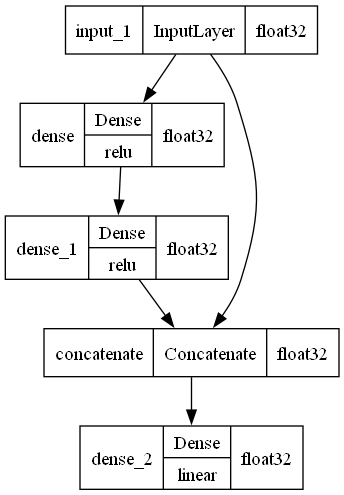

In [7]:
keras.utils.plot_model(
    model, to_file='img/ModelsWide&Deep.png', show_shapes=False, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=True, show_trainable=False
)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [9]:
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
    loss      = keras.losses.mean_squared_error,
)
history = model.fit(xtrain, ytrain, epochs=20, validation_data=(xvalid,yvalid), batch_size=32)

Epoch 1/20

363/363 [==============================] - 2s 4ms/step - loss: 2.1663 - val_loss: 0.7717
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6974 - val_loss: 0.6467
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6181 - val_loss: 0.6066
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5818
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5471 - val_loss: 0.5564
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5228 - val_loss: 0.5427
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5037 - val_loss: 0.5298
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4885 - val_loss: 0.5165
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4763 - val_loss: 0.5090
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4663 - val_loss: 0.499

In [10]:
model.evaluate(xtestF)

162/162 [==============================] - 0s 2ms/step - loss: 0.0000e+00


0.0

In [11]:
predict = model.predict(xtestF)

162/162 [==============================] - 0s 2ms/step


In [12]:
mean_absolute_error(ytestF,predict), mean_squared_error(ytestF, predict), r2_score(ytestF, predict)

(0.4677470903777226, 0.4119092774073547, 0.6887064378291583)

### Diversas entradas

In [13]:
xtrainA, xtrainB = xtrain[:,:5], xtrain[:,2:]
xvalidA, xvalidB = xvalid[:,:5], xvalid[:,2:]

xtestA, xtestB = xtestF[:,:5], xtestF[:,2:]

In [14]:
input_A = keras.layers.Input(shape=xtrainA.shape[1:], name='wideInput')
input_B = keras.layers.Input(shape=xtrainB.shape[1:], name='deepInput')

oculta1 = keras.layers.Dense(30, activation='relu', name='Camada_oculta1')(input_B)
oculta2 = keras.layers.Dense(30, activation='relu', name='Camada_oculta2')(oculta1)

concat = keras.layers.Concatenate(name='concat')([input_A,oculta2])

output = keras.layers.Dense(1, name='saida')(concat)

model = keras.Model(inputs=[input_A,input_B], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deepInput (InputLayer)      [(None, 6)]                  0         []                            
                                                                                                  
 Camada_oculta1 (Dense)      (None, 30)                   210       ['deepInput[0][0]']           
                                                                                                  
 wideInput (InputLayer)      [(None, 5)]                  0         []                            
                                                                                                  
 Camada_oculta2 (Dense)      (None, 30)                   930       ['Camada_oculta1[0][0]']      
                                                                                            

__________________________________________________________________________________________________


In [15]:
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
    loss      = keras.losses.mean_squared_error,
    metrics   = [keras.metrics.mean_absolute_error] 
    )
history =  model.fit((xtrainA, xtrainB) , ytrain, epochs=20, validation_data=((xvalidA,xvalidB),yvalid))

Epoch 1/20

363/363 [==============================] - 2s 3ms/step - loss: 2.4413 - mean_absolute_error: 1.1307 - val_loss: 1.0167 - val_mean_absolute_error: 0.7633
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8283 - mean_absolute_error: 0.6898 - val_loss: 0.7639 - val_mean_absolute_error: 0.6673
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6593 - mean_absolute_error: 0.6115 - val_loss: 0.6803 - val_mean_absolute_error: 0.6204
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5919 - mean_absolute_error: 0.5721 - val_loss: 0.6366 - val_mean_absolute_error: 0.5990
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5522 - mean_absolute_error: 0.5484 - val_loss: 0.6048 - val_mean_absolute_error: 0.5822
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5242 - mean_absolute_error: 0.5304 - val_loss: 0.5804 - val_mean_absolute_error: 0.5713
Epoch 7/20
363/

<Axes: >

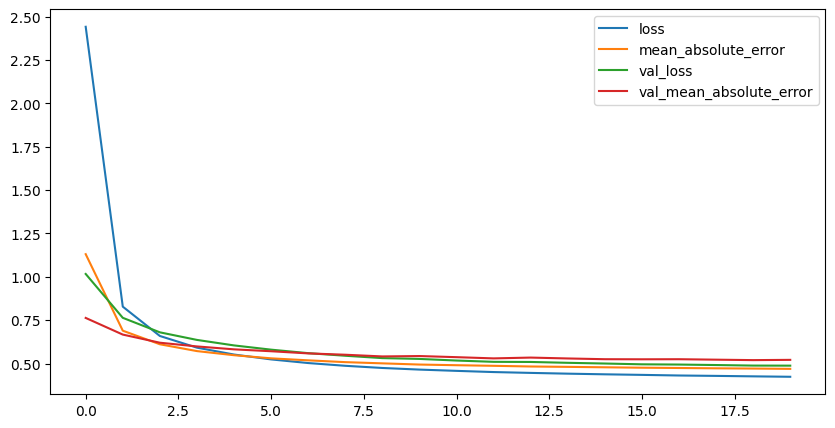

In [16]:
pd.DataFrame(history.history).plot(figsize=(10,5))

In [17]:
model.evaluate((xtestA,xtestB))

162/162 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00


[0.0, 0.0]

In [18]:
predict = model.predict((xtestA,xtestB))

162/162 [==============================] - 0s 2ms/step


In [19]:
mean_absolute_error(ytestF,predict), mean_squared_error(ytestF, predict), r2_score(ytestF, predict)

(0.4855450682005143, 0.42893438105751935, 0.6758399998723692)

### adicionar uma saida para regularização